In [1]:
#importing the libraries
!pip install missingno
!python --version
!pip freeze
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

Python 3.7.3
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==2.2.5
astropy==3.1.2
atomicwrites==1.3.0
attrs==19.1.0
Babel==2.6.0
backcall==0.1.0
backports.os==0.1.1
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.7.1
bitarray==0.8.3
bkcharts==0.2
bleach==3.1.0
bokeh==1.0.4
boto==2.49.0
Bottleneck==1.2.1
certifi==2019.3.9
cffi==1.12.2
chardet==3.0.4
Click==7.0
cloudpickle==0.8.0
clyent==1.2.2
colorama==0.4.1
comtypes==1.1.7
conda==4.6.11
conda-build==3.17.8
conda-verify==3.1.1
contextlib2==0.5.5
cryptography==2.6.1
cycler==0.10.0
Cython==0.29.6
cytoolz==0.9.0.1
dask==1.1.4
decorator==4.4.0
defusedxml==0.5.0
distributed==1.26.0
docutils==0.14
entrypoints==0.3
et-xmlfile==1.0.1
fastcache==1.0.2
filelock==3.0.10
Flask==1.0.2
future==0.17.1
gevent==1.4.0
glob2==0.6
greenlet==0.4.15
h5py==2.9.0
heapdict==1.0.0
html5lib==1.0.1
idna==2.8
imageio==2.5.0
imagesize==1.1.0
importlib-metadata==0.0.0
ipykernel==5.1.0


In [2]:
data = pd.read_csv('example_sprit_cut_prices.csv', sep= ';')
d1=pd.read_csv('example_sprit_cut_prices.csv', sep=';')
data_station=pd.read_csv('example_sprit_cut_station.csv', sep= ';')
d2=pd.read_csv('example_sprit_cut_station.csv', sep= ';')

In [3]:
d1.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [4]:
d1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21


In [5]:
d2.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


In [7]:
d1['DATE_CHANGED']=pd.to_datetime(d1.DATE_CHANGED)

In [8]:
d1.tail()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
2189521,f5552423-47e5-4290-bce2-5625bb6c8a69,1329,1309,1169,2015-02-14 13:46:01,21
2189522,f5552423-47e5-4290-bce2-5625bb6c8a69,1429,1409,1259,2015-02-16 05:06:01,21
2189523,f5552423-47e5-4290-bce2-5625bb6c8a69,1389,1369,1219,2015-02-16 07:22:01,21
2189524,f5552423-47e5-4290-bce2-5625bb6c8a69,1369,1349,1239,2015-02-17 07:10:01,21
2189525,f5552423-47e5-4290-bce2-5625bb6c8a69,1369,1349,1219,2015-02-17 08:02:01,1


In [9]:
d1.shape

(2189526, 6)

In [10]:
#data cleaning
#dropping NA values and duplicate rows
d1.dropna()
d1.drop_duplicates(inplace= True)


In [11]:
#dropping rows with prices less than or equal to zero
indexvalues = d1[ (d1['E10'] <= 0) | (d1['E5'] <= 0) | (d1['DIESEL'] <= 0) ].index
d1= d1.drop(indexvalues, axis=0)

In [12]:
indexvalues


Int64Index([   1666,    1667,    1668,    1669,    1670,    1671,    1672,
               1673,    1674,    1675,
            ...
            2118204, 2118205, 2118206, 2118207, 2118208, 2118209, 2118210,
            2133028, 2133029, 2133030],
           dtype='int64', length=19338)

In [13]:
d1.shape

(1075425, 6)

In [14]:
d1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21


In [15]:

# calculating the summary statistics with function

def data_normalization(col_name):   
    data_mean, data_std = d1[col_name].mean(), d1[col_name].std()
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off


    d1[col_name]=np.where(np.logical_or(d1[col_name] < lower,d1[col_name] > upper), d1[col_name].median(), d1[col_name])

data_normalization('E5')
data_normalization('E10')
data_normalization('DIESEL')

In [16]:
STID_Days=d1.groupby('STID')['DATE_CHANGED'].min().reset_index()
STID_Days.head()

,STID,DATE_CHANGED
0,00060385-0001-4444-8888-acdc00000001,2014-08-29 15:46:01
1,00060458-0001-4444-8888-acdc00000001,2014-06-09 00:02:01
2,00060562-0001-4444-8888-acdc00000001,2014-08-21 14:38:01
3,00060710-0001-4444-8888-acdc00000001,2014-06-09 00:02:01
4,00060982-0001-4444-8888-acdcffffffff,2014-08-19 08:46:01


In [17]:
d2.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [18]:
d2['POST_CODE'].fillna(value=0, inplace=True)
d2

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400
5,51d4b5b9-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET BAD DUERKHEIM GUTLEUTSTR. 10,JET,GUTLEUTSTR. 10,\N,67098,BAD DUERKHEIM,\N,49.464100,8.177850
6,51d4b5c5-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt ALZEY FRI...,Supermarkt-Tankstelle am real- Markt,FRIEDRICHSTR. 15,\N,55232,ALZEY,\N,49.742900,8.107890
7,51d4b45d-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt MUTTERSTA...,Supermarkt-Tankstelle am real- Markt,AN DER FOHLENWEIDE 19,\N,67112,MUTTERSTADT,\N,49.425200,8.365010
8,00060458-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:26.000000,Tankhof Iffezheim,Tankhof Iffezheim,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
9,00060385-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:29.000000,FREIE Tankstelle,Schiffer & Nicklaus GmbH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010


In [19]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    824 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.3+ KB


In [20]:
d2['POST_CODE'].replace(to_replace=['nicht'] ,value='0',inplace=True)
d2['POST_CODE'].replace(to_replace=['\\N'] ,value='0',inplace=True)
d2

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400
5,51d4b5b9-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET BAD DUERKHEIM GUTLEUTSTR. 10,JET,GUTLEUTSTR. 10,\N,67098,BAD DUERKHEIM,\N,49.464100,8.177850
6,51d4b5c5-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt ALZEY FRI...,Supermarkt-Tankstelle am real- Markt,FRIEDRICHSTR. 15,\N,55232,ALZEY,\N,49.742900,8.107890
7,51d4b45d-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt MUTTERSTA...,Supermarkt-Tankstelle am real- Markt,AN DER FOHLENWEIDE 19,\N,67112,MUTTERSTADT,\N,49.425200,8.365010
8,00060458-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:26.000000,Tankhof Iffezheim,Tankhof Iffezheim,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
9,00060385-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:29.000000,FREIE Tankstelle,Schiffer & Nicklaus GmbH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010


In [21]:
d2.BRAND.nunique()

55

In [22]:
d2.BRAND.unique()

array(['ARAL', 'JET', 'Supermarkt-Tankstelle am real- Markt',
       'Tankhof Iffezheim', 'Schiffer & Nicklaus GmbH', nan,
       'Sefrin Heizöl & Kraftstoffe', 'bft', 'Markant', 'AVIA',
       'nicht mehr aktiv', 'Bft', 'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'Freie', 'rnt', '\\N',
       'Schuster & Sohn KG', 'Raiffeisen', 'E Center',
       'Eberhardt Jöhlingen', 'BFT', 'Agip', 'Winkler',
       'Mr. Wash Autoservice AG', 'ESSO', 'ZG Raiffeisen Energie',
       'Supermarkt-Tankstelle', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Supermarkt Tankstelle', 'Raiffeisen Tankstelle', 'Preis', 'mtb',
       'Tankcenter', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH', 'OIL!',
       'SB Markt', 'SB', 'TOTAL', 'ED', 'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

In [23]:
brands=d2[d2['BRAND']=='nicht mehr aktiv' ]
d2.drop(brands.index,axis=0,inplace=True)

In [24]:
d2['BRAND'].replace(to_replace=['\\N'],value='No Brand',inplace=True)
d2['BRAND'].fillna(value='No Brand', inplace= True)

In [25]:
d2.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [26]:
d2.rename(columns={'ID': 'STID'}, inplace=True)
d2

,STID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400
5,51d4b5b9-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET BAD DUERKHEIM GUTLEUTSTR. 10,JET,GUTLEUTSTR. 10,\N,67098,BAD DUERKHEIM,\N,49.464100,8.177850
6,51d4b5c5-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt ALZEY FRI...,Supermarkt-Tankstelle am real- Markt,FRIEDRICHSTR. 15,\N,55232,ALZEY,\N,49.742900,8.107890
7,51d4b45d-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt MUTTERSTA...,Supermarkt-Tankstelle am real- Markt,AN DER FOHLENWEIDE 19,\N,67112,MUTTERSTADT,\N,49.425200,8.365010
8,00060458-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:26.000000,Tankhof Iffezheim,Tankhof Iffezheim,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
9,00060385-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:29.000000,FREIE Tankstelle,Schiffer & Nicklaus GmbH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010


In [27]:
d2.drop_duplicates()

,STID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400
5,51d4b5b9-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET BAD DUERKHEIM GUTLEUTSTR. 10,JET,GUTLEUTSTR. 10,\N,67098,BAD DUERKHEIM,\N,49.464100,8.177850
6,51d4b5c5-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt ALZEY FRI...,Supermarkt-Tankstelle am real- Markt,FRIEDRICHSTR. 15,\N,55232,ALZEY,\N,49.742900,8.107890
7,51d4b45d-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt MUTTERSTA...,Supermarkt-Tankstelle am real- Markt,AN DER FOHLENWEIDE 19,\N,67112,MUTTERSTADT,\N,49.425200,8.365010
8,00060458-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:26.000000,Tankhof Iffezheim,Tankhof Iffezheim,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
9,00060385-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:29.000000,FREIE Tankstelle,Schiffer & Nicklaus GmbH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010


In [28]:
d2.shape

(822, 12)

In [29]:
d2.STID.nunique()

411

In [30]:
d2.BRAND.nunique()

54

In [31]:
d2.BRAND.unique

<bound method Series.unique of 0                                      ARAL
1                                       JET
2                                      ARAL
3                                       JET
4                                       JET
5                                       JET
6      Supermarkt-Tankstelle am real- Markt
7      Supermarkt-Tankstelle am real- Markt
8                         Tankhof Iffezheim
9                  Schiffer & Nicklaus GmbH
10                 Schiffer & Nicklaus GmbH
11                                 No Brand
12              Sefrin Heizöl & Kraftstoffe
13                                 No Brand
14                                 No Brand
15                                 No Brand
16                                 No Brand
17                                 No Brand
18                                      bft
19                                 No Brand
20                                  Markant
21                                     AVIA
2

In [32]:
d2.BRAND.unique()

array(['ARAL', 'JET', 'Supermarkt-Tankstelle am real- Markt',
       'Tankhof Iffezheim', 'Schiffer & Nicklaus GmbH', 'No Brand',
       'Sefrin Heizöl & Kraftstoffe', 'bft', 'Markant', 'AVIA', 'Bft',
       'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'Freie', 'rnt',
       'Schuster & Sohn KG', 'Raiffeisen', 'E Center',
       'Eberhardt Jöhlingen', 'BFT', 'Agip', 'Winkler',
       'Mr. Wash Autoservice AG', 'ESSO', 'ZG Raiffeisen Energie',
       'Supermarkt-Tankstelle', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Supermarkt Tankstelle', 'Raiffeisen Tankstelle', 'Preis', 'mtb',
       'Tankcenter', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH', 'OIL!',
       'SB Markt', 'SB', 'TOTAL', 'ED', 'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

In [33]:
d2['BRAND'].replace(to_replace=['Supermarkt-Tankstelle'],value='Supermarkt Tankstelle',inplace=True)

In [34]:
d2.BRAND.nunique()

53

In [35]:
d2['BRAND']=d2['BRAND'].str.upper()
d2.BRAND.nunique()

49

In [36]:
d2.BRAND.unique()

array(['ARAL', 'JET', 'SUPERMARKT-TANKSTELLE AM REAL- MARKT',
       'TANKHOF IFFEZHEIM', 'SCHIFFER & NICKLAUS GMBH', 'NO BRAND',
       'SEFRIN HEIZÖL & KRAFTSTOFFE', 'BFT', 'MARKANT', 'AVIA',
       'FREIE TANKSTELLE',
       'AUTO ZOTZ LANDAU IN DER PFALZ   TANKEN UND WASCHEN', 'HEM',
       'FRITZ WALTER GMBH', 'TAMOIL', 'FREIE', 'RNT',
       'SCHUSTER & SOHN KG', 'RAIFFEISEN', 'E CENTER',
       'EBERHARDT JÖHLINGEN', 'AGIP', 'WINKLER',
       'MR. WASH AUTOSERVICE AG', 'ESSO', 'ZG RAIFFEISEN ENERGIE',
       'SUPERMARKT TANKSTELLE', 'CLASSIC', 'SHELL',
       'RAIFFEISEN TANKSTELLE', 'PREIS', 'MTB', 'TANKCENTER', 'TS ARNT',
       'FREI', 'OMV', 'FRÜHMESSER GMBH', 'OIL!', 'SB MARKT', 'SB',
       'TOTAL', 'ED', 'SB-MARKTTANKSTELLE',
       'AUTO ZOTZ HERXHEIM B.LD.       TANKEN AN L.493', 'MARKENFREIE TS',
       'TOP', 'T', 'ELAN', 'TANKSTELLE HEINZ'], dtype=object)

In [37]:
d2['BRAND'].replace(to_replace=['FREIE'],value='FREIE TANKSTELLE',inplace=True)

In [38]:
d2.rename(columns={'VERSION_TIME': 'DATE_CHANGED'}, inplace=True)
d2

,STID,VERSION,DATE_CHANGED,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400
5,51d4b5b9-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET BAD DUERKHEIM GUTLEUTSTR. 10,JET,GUTLEUTSTR. 10,\N,67098,BAD DUERKHEIM,\N,49.464100,8.177850
6,51d4b5c5-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt ALZEY FRI...,SUPERMARKT-TANKSTELLE AM REAL- MARKT,FRIEDRICHSTR. 15,\N,55232,ALZEY,\N,49.742900,8.107890
7,51d4b45d-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle am real- Markt MUTTERSTA...,SUPERMARKT-TANKSTELLE AM REAL- MARKT,AN DER FOHLENWEIDE 19,\N,67112,MUTTERSTADT,\N,49.425200,8.365010
8,00060458-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:26.000000,Tankhof Iffezheim,TANKHOF IFFEZHEIM,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
9,00060385-0001-4444-8888-acdc00000001,5,2014-11-03 00:00:29.000000,FREIE Tankstelle,SCHIFFER & NICKLAUS GMBH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010


In [39]:
d2['DATE_CHANGED']=pd.to_datetime(d2.DATE_CHANGED)

In [40]:
#converting the DATE_CHANGED column to number of days
STID_Days_max=d1.groupby('STID')['DATE_CHANGED'].max().reset_index()
STID_Days_min=d1.groupby('STID')['DATE_CHANGED'].min().reset_index()

max_date=STID_Days_max['DATE_CHANGED']
min_date=STID_Days_min['DATE_CHANGED']
no_days= max_date-min_date
#converting the days obtained to absolute days
Days = no_days.apply(lambda x: x.days)


In [41]:
STID_Days.DATE_CHANGED= Days
STID_Days.head()

,STID,DATE_CHANGED
0,00060385-0001-4444-8888-acdc00000001,394
1,00060458-0001-4444-8888-acdc00000001,477
2,00060562-0001-4444-8888-acdc00000001,404
3,00060710-0001-4444-8888-acdc00000001,477
4,00060982-0001-4444-8888-acdcffffffff,406


In [42]:
STID_Days.rename(columns={'DATE_CHANGED': ' Days' }, inplace=True)
STID_Days

,STID,Days
0,00060385-0001-4444-8888-acdc00000001,394
1,00060458-0001-4444-8888-acdc00000001,477
2,00060562-0001-4444-8888-acdc00000001,404
3,00060710-0001-4444-8888-acdc00000001,477
4,00060982-0001-4444-8888-acdcffffffff,406
5,00b33b42-8357-40c2-baf5-c7c49b40b2af,478
6,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f,478
7,01bf5a06-4248-43a5-9524-56123fa3ab2f,478
8,01ddc2f2-35ca-4a02-a47c-190ebabe558b,472
9,033bce61-7584-45e7-94dd-952fd0b4899c,478


In [43]:
Brand_Days=pd.merge(STID_Days,d2,on="STID")

In [44]:
Brand_Days.head()

,STID,Days,VERSION,DATE_CHANGED,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,00060385-0001-4444-8888-acdc00000001,394,5,2014-11-03 00:00:29,FREIE Tankstelle,SCHIFFER & NICKLAUS GMBH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010
1,00060385-0001-4444-8888-acdc00000001,394,5,2014-11-03 00:00:29,FREIE Tankstelle,SCHIFFER & NICKLAUS GMBH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010
2,00060458-0001-4444-8888-acdc00000001,477,5,2014-11-03 00:00:26,Tankhof Iffezheim,TANKHOF IFFEZHEIM,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
3,00060458-0001-4444-8888-acdc00000001,477,5,2014-11-03 00:00:26,Tankhof Iffezheim,TANKHOF IFFEZHEIM,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
4,00060562-0001-4444-8888-acdc00000001,404,5,2014-11-03 00:00:10,Tankcenter Ziehl,NO BRAND,Carl-Benz Str.,28,67227,Frankenthal,\N,49.543491,8.336738


In [45]:
Brand_Days

,STID,Days,VERSION,DATE_CHANGED,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,00060385-0001-4444-8888-acdc00000001,394,5,2014-11-03 00:00:29,FREIE Tankstelle,SCHIFFER & NICKLAUS GMBH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010
1,00060385-0001-4444-8888-acdc00000001,394,5,2014-11-03 00:00:29,FREIE Tankstelle,SCHIFFER & NICKLAUS GMBH,Kirchheimer Str.,45 A,67269,Grünstadt,\N,49.560261,8.169010
2,00060458-0001-4444-8888-acdc00000001,477,5,2014-11-03 00:00:26,Tankhof Iffezheim,TANKHOF IFFEZHEIM,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
3,00060458-0001-4444-8888-acdc00000001,477,5,2014-11-03 00:00:26,Tankhof Iffezheim,TANKHOF IFFEZHEIM,Südring,19,76473,Iffezheim,\N,48.816753,8.157388
4,00060562-0001-4444-8888-acdc00000001,404,5,2014-11-03 00:00:10,Tankcenter Ziehl,NO BRAND,Carl-Benz Str.,28,67227,Frankenthal,\N,49.543491,8.336738
5,00060562-0001-4444-8888-acdc00000001,404,5,2014-11-03 00:00:10,Tankcenter Ziehl,NO BRAND,Carl-Benz Str.,28,67227,Frankenthal,\N,49.543491,8.336738
6,00060710-0001-4444-8888-acdc00000001,477,5,2014-11-03 00:00:08,SBK Selbstbedienungskauf GmbH Tankstelle,NO BRAND,Weißenburger Str.,16,66994,Dahn,\N,49.147930,7.779330
7,00060710-0001-4444-8888-acdc00000001,477,5,2014-11-03 00:00:08,SBK Selbstbedienungskauf GmbH Tankstelle,NO BRAND,Weißenburger Str.,16,66994,Dahn,\N,49.147930,7.779330
8,00060982-0001-4444-8888-acdcffffffff,406,5,2014-11-03 00:00:06,Tankstelle Heinz,TANKSTELLE HEINZ,Fettweißstrasse,8,76189,Karlsruhe,\N,49.008991,8.327440
9,00060982-0001-4444-8888-acdcffffffff,406,5,2014-11-03 00:00:06,Tankstelle Heinz,TANKSTELLE HEINZ,Fettweißstrasse,8,76189,Karlsruhe,\N,49.008991,8.327440


# 1. How many different stations exist in the data set and what is the existing history in days (bar chart)?

<Figure size 1440x360 with 0 Axes>

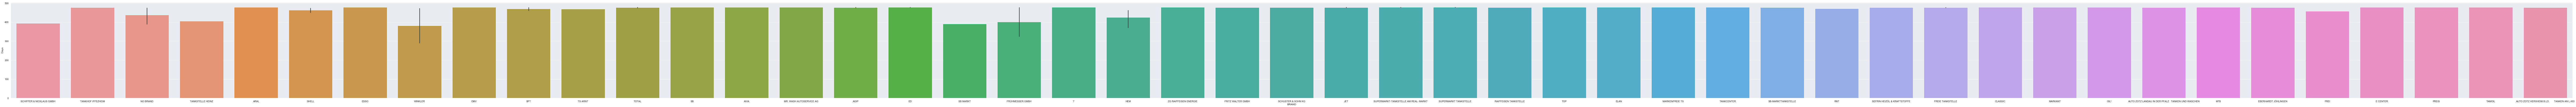

<Figure size 1440x360 with 0 Axes>

In [46]:

sns.set(rc={'figure.figsize':(210,8)})
ax = sns.barplot(x=(Brand_Days['BRAND']),y=' Days',data= Brand_Days)
plt.figure(figsize=(20,5))

In [47]:
d1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21


In [48]:
d1

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21
5,01bf5a06-4248-43a5-9524-56123fa3ab2f,1629.0,1589.0,1429.0,2014-10-04 23:10:01,21
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1549.0,1509.0,1389.0,2014-10-06 06:02:01,20
7,01bf5a06-4248-43a5-9524-56123fa3ab2f,1549.0,1509.0,1379.0,2014-10-06 07:38:01,1
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1549.0,1509.0,1339.0,2014-10-06 08:26:01,1
9,01bf5a06-4248-43a5-9524-56123fa3ab2f,1559.0,1519.0,1309.0,2014-10-07 07:38:01,1


In [49]:

d1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21


In [50]:
d1['Week_Number'] = d1['DATE_CHANGED'].dt.week
d1['Year'] = d1['DATE_CHANGED'].dt.year
d1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Week_Number,Year
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589.0,1549.0,1389.0,2014-10-02 05:22:01,21,40,2014
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1369.0,2014-10-02 05:26:01,21,40,2014
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569.0,1529.0,1359.0,2014-10-02 09:06:01,1,40,2014
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539.0,1499.0,1339.0,2014-10-03 12:14:01,21,40,2014
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529.0,1489.0,1329.0,2014-10-03 14:14:01,21,40,2014


In [51]:
d1=d1.sort_values(by=['DATE_CHANGED'])


In [67]:
d1

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Week_Number,Year
436610,5eae9c7e-ca05-4518-90b9-cf5200ee9066,1519.0,1479.0,1309.0,2014-06-08 09:50:01,21,23,2014
320664,8c36f834-0060-4623-8213-6f6eb98cd69a,1559.0,1519.0,1359.0,2014-06-08 09:50:01,21,23,2014
71849,2d449fb7-b190-4fd4-ac0b-12ea39309f63,1579.0,1539.0,1369.0,2014-06-08 09:50:01,21,23,2014
155183,51d4b6bb-a095-1aa0-e100-80009459e03a,1509.0,1469.0,1309.0,2014-06-08 09:50:01,21,23,2014
157520,6aafd46e-f892-486b-b9c0-bee7489a5ac6,1579.0,1539.0,1359.0,2014-06-08 09:50:01,21,23,2014
1417236,5d54e0a1-26d9-43d7-9f54-575714f8f67e,1589.0,1549.0,1399.0,2014-06-08 09:50:01,20,23,2014
435976,61b7f87a-3589-48d0-bbf2-0c2dedf6b970,1579.0,1539.0,1379.0,2014-06-08 09:50:01,21,23,2014
1201129,7eb451d6-8f49-4f82-9c0e-da65884e5e75,1539.0,1499.0,1339.0,2014-06-08 09:50:01,21,23,2014
1456761,e707bd23-1806-420a-9909-b14c1e221775,1669.0,1629.0,1459.0,2014-06-08 09:50:01,21,23,2014
1465070,2ba49a03-9f49-4d0e-80f0-851e6e5ade6e,1639.0,1599.0,1439.0,2014-06-08 09:50:01,21,23,2014


# 2. What is the min, mean, max price for each gasoline type and station weekly (timeseries graph)

Text(0, 0.5, 'Price in Euros')

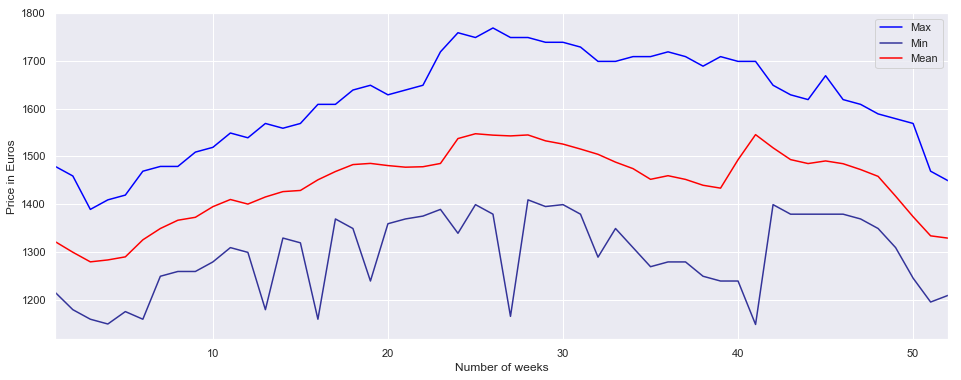

In [64]:
d1.groupby(d1.DATE_CHANGED.dt.week)['E5'].max().plot(kind='line', colormap='winter', figsize=[16,6], label='Max')
d1.groupby(d1.DATE_CHANGED.dt.week)['E5'].min().plot(kind='line', colormap='terrain', figsize=[16,6], label='Min')
d1.groupby(d1.DATE_CHANGED.dt.week)['E5'].mean().plot(kind='line', colormap='autumn', figsize=[16,6], label='Mean')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

Text(0, 0.5, 'Price in Euros')

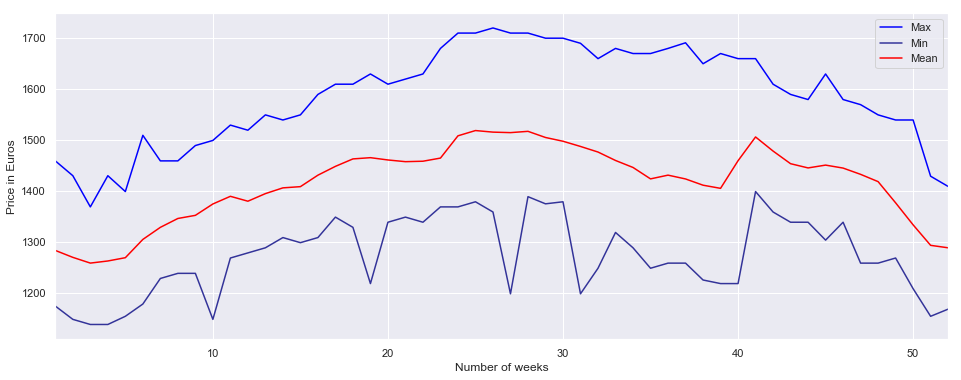

In [65]:
d1.groupby(d1.DATE_CHANGED.dt.week)['E10'].max().plot(kind='line', colormap='winter', figsize=[16,6], label='Max')
d1.groupby(d1.DATE_CHANGED.dt.week)['E10'].min().plot(kind='line', colormap='terrain', figsize=[16,6], label='Min')
d1.groupby(d1.DATE_CHANGED.dt.week)['E10'].mean().plot(kind='line', colormap='autumn', figsize=[16,6], label='Mean')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

Text(0, 0.5, 'Price in Euros')

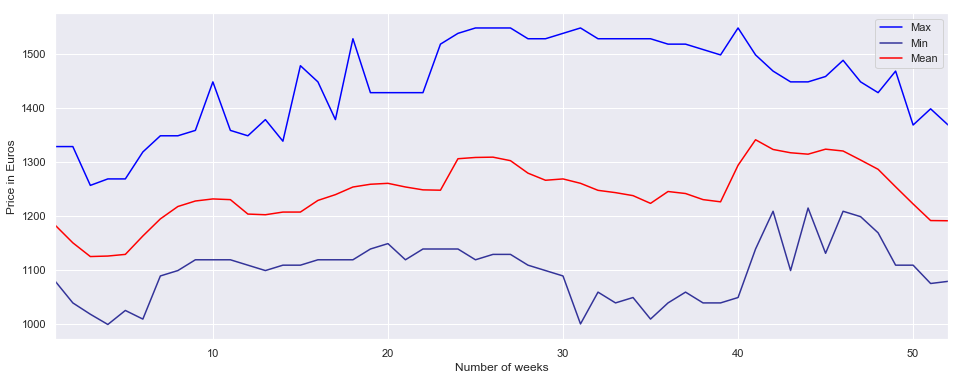

In [66]:
d1.groupby(d1.DATE_CHANGED.dt.week)['DIESEL'].max().plot(kind='line', colormap='winter', figsize=[16,6], label='Max')
d1.groupby(d1.DATE_CHANGED.dt.week)['DIESEL'].min().plot(kind='line', colormap='terrain', figsize=[16,6], label='Min')
d1.groupby(d1.DATE_CHANGED.dt.week)['DIESEL'].mean().plot(kind='line', colormap='autumn', figsize=[16,6], label='Mean')
plt.legend(loc='upper right')
plt.xlabel('Number of weeks')
plt.ylabel('Price in Euros')

# 3.What is cheapest station (in average) and why?

Cheapest station ID with the  average price is displayed for  E5, E10 and Diesel.

In [94]:
def mean_price(col_name):
    z=d1.groupby('STID').mean()[[col_name]]
    z=z.sort_values(by=col_name)
    print(z[:1])

cheapest_stn_E5=mean_price('E5')
cheapest_stn_E10=mean_price('E10')
cheapest_stn_DIESEL=mean_price('DIESEL')

                                               E5
STID                                             
eef314cf-a84a-4648-9284-c2df1efa36c9  1351.719298
                                              E10
STID                                             
eef314cf-a84a-4648-9284-c2df1efa36c9  1320.052632
                                           DIESEL
STID                                             
de1e26ff-6fb8-436e-b819-877ab581527a  1120.627451


# 4.At which day of a weak is the price most likely the cheapest (week profile)

In [99]:
Week_day_cheapprice=d1.groupby(d1.DATE_CHANGED.dt.weekday_name)[['E5','E10','DIESEL']].mean().reset_index()

In [119]:
Week_day_cheapprice

,DATE_CHANGED,E5,E10,DIESEL
0,Friday,1455.638343,1427.668730,1246.441283
1,Monday,1458.796355,1430.497998,1249.917831
2,Saturday,1454.793504,1427.018196,1245.856266
3,Sunday,1461.109988,1433.628402,1250.781816
4,Thursday,1455.991333,1428.041037,1246.841517
5,Tuesday,1456.923483,1428.941866,1247.273223
6,Wednesday,1456.641937,1428.680330,1247.101392


# cheapest day is saturday

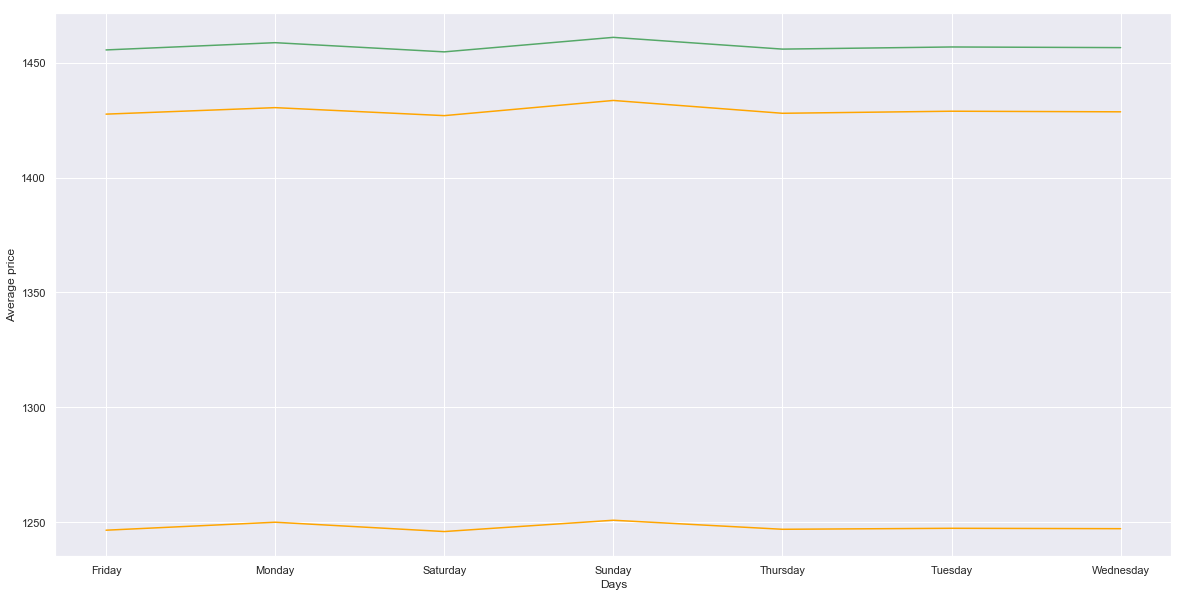

In [115]:
plt.figure(figsize=(20,10))

plt.plot(Week_day_cheapprice['DATE_CHANGED'], Week_day_cheapprice['E5'], color='g')
plt.plot(Week_day_cheapprice['DATE_CHANGED'], Week_day_cheapprice['E10'], color='orange')
plt.plot(Week_day_cheapprice['DATE_CHANGED'], Week_day_cheapprice['DIESEL'], color='orange')
plt.xlabel('Days')
plt.ylabel('Average price')
plt.show()

# 5.At which hour during a day is the price the cheapest in average (hour profile)

In [117]:
Hour_cheapprice=d1.groupby(d1.DATE_CHANGED.dt.hour)[['E5','E10','DIESEL']].mean().reset_index()
Hour_cheapprice

,DATE_CHANGED,E5,E10,DIESEL
0,0,1586.741574,1549.493534,1373.575501
1,1,1589.199087,1551.083919,1380.973783
2,2,1594.303622,1554.583215,1381.981297
3,3,1573.342503,1535.575095,1357.749355
4,4,1546.910692,1511.923126,1338.227174
5,5,1488.328471,1458.696325,1293.516360
6,6,1474.583347,1446.724359,1264.661242
7,7,1464.071830,1436.325342,1255.046997
8,8,1454.199396,1425.891281,1247.159755
9,9,1445.462277,1417.387050,1236.510078


TypeError: 'int' object is not iterable

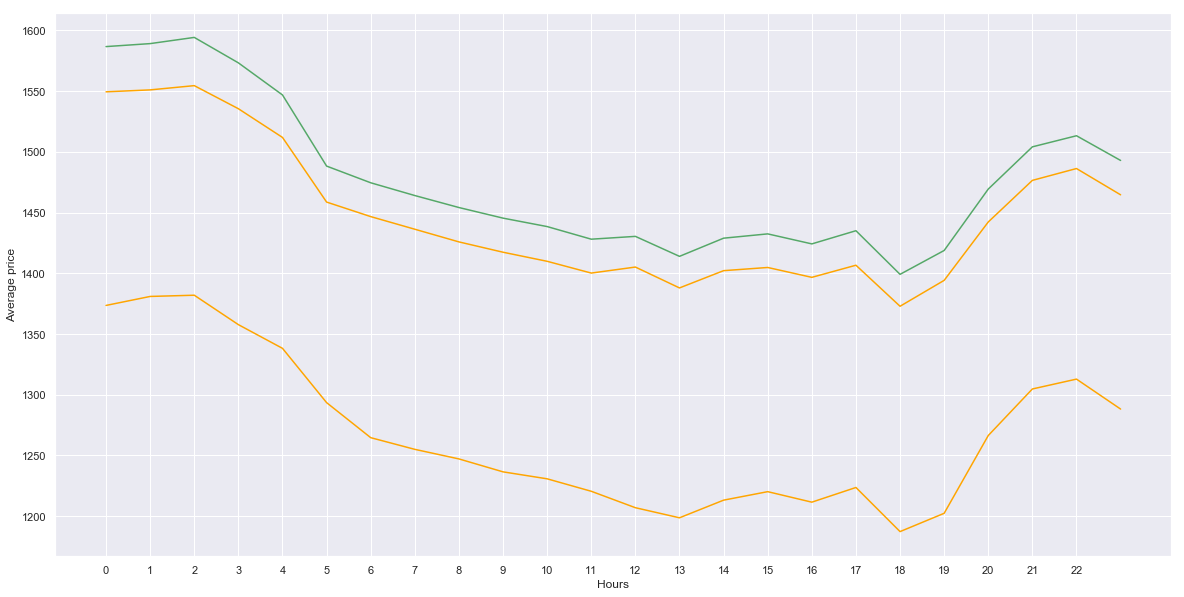

In [123]:
plt.figure(figsize=(20,10))
x=23
xi = [i for i in range(0, 23)]
plt.plot(Hour_cheapprice['DATE_CHANGED'], Hour_cheapprice['E5'], color='g')
plt.plot(Hour_cheapprice['DATE_CHANGED'], Hour_cheapprice['E10'], color='orange')
plt.plot(Hour_cheapprice['DATE_CHANGED'], Hour_cheapprice['DIESEL'], color='orange')
plt.xlabel('Hours')
plt.ylabel('Average price')
plt.xticks(xi, x)
plt.show()

# Price is cheap at 18 Hrs

# 6.How many different station locations are present in the data (visualize via a map)

In [135]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [136]:
locations = d2[['LAT','LNG']]
locations.drop_duplicates(inplace=True)


C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [137]:
import folium
map = folium.Map(location=[49.633409, 8.273847], zoom_start=7)
for point in range(0, len(locations)):
    folium.Marker([locations.iloc[point,0],locations.iloc[point,1]], popup="test").add_to(map)
map

# 7. What is the gas station which has most price data points, choose one and draw the time series for all 3 gasonline types

In [129]:
gas_station=d1.groupby('STID').E5.count().sort_values(ascending= False)
gas_station.reset_index()
gas_station.head()

STID
5374ea5c-bf3e-4b0a-8504-049368adcdba    4963
9b81b226-01ca-4065-b68e-ad616adcd293    4887
a6fdf6e7-d225-49b1-95a6-9465c4f3a980    4565
4ed45709-ee79-489d-be83-b0d188d17494    4469
e0b19675-dfe9-45d4-9af0-59390cd39c09    4418
Name: E5, dtype: int64

In [142]:

station_data=d1[d1['STID']=='5374ea5c-bf3e-4b0a-8504-049368adcdb']

In [132]:
station_data.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Week_Number,Year
1251391,5374ea5c-bf3e-4b0a-8504-049368adcdba,1539.0,1499.0,1339.0,2014-06-08 09:50:01,21,23,2014
466604,5374ea5c-bf3e-4b0a-8504-049368adcdba,1529.0,1489.0,1329.0,2014-06-08 12:06:01,21,23,2014
466605,5374ea5c-bf3e-4b0a-8504-049368adcdba,1669.0,1629.0,1469.0,2014-06-08 15:18:01,21,23,2014
1327327,5374ea5c-bf3e-4b0a-8504-049368adcdba,1649.0,1609.0,1449.0,2014-06-09 00:02:01,21,24,2014
1248524,5374ea5c-bf3e-4b0a-8504-049368adcdba,1619.0,1579.0,1419.0,2014-06-09 02:10:01,21,24,2014


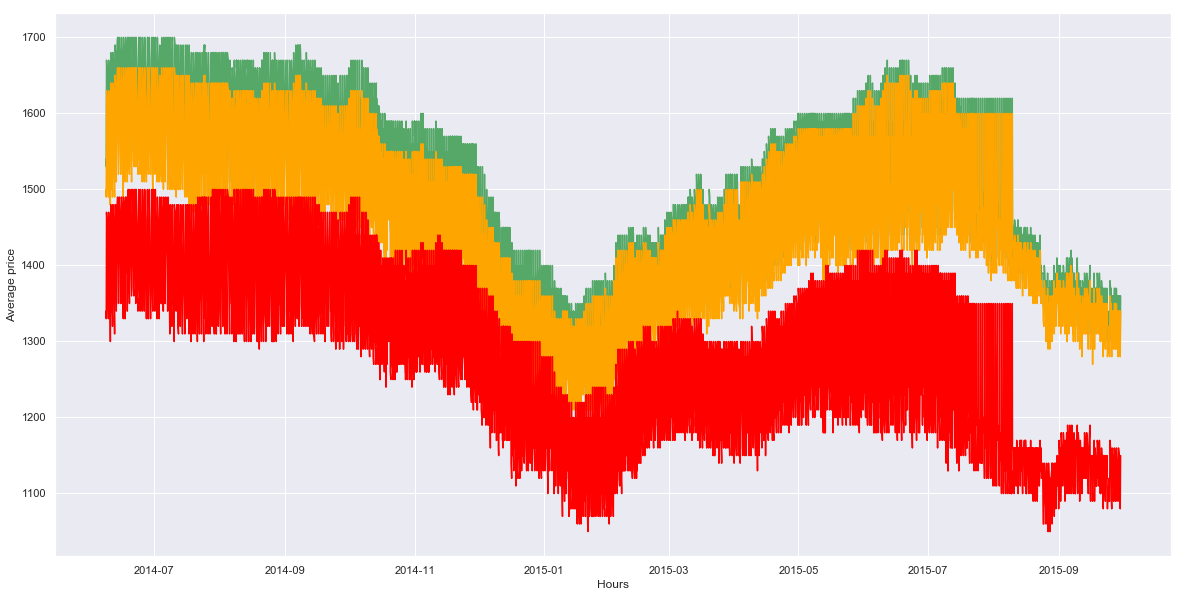

In [141]:
plt.figure(figsize=(20,10))
plt.plot(station_data['DATE_CHANGED'], station_data['E5'], color='g')
plt.plot(station_data['DATE_CHANGED'], station_data['E10'], color='orange')
plt.plot(station_data['DATE_CHANGED'], station_data['DIESEL'], color='red')
plt.xlabel('Hours')
plt.ylabel('Average price')
plt.show()

# 8. At which hour during a day do we have the most price changes

Text(0, 0.5, 'Count')

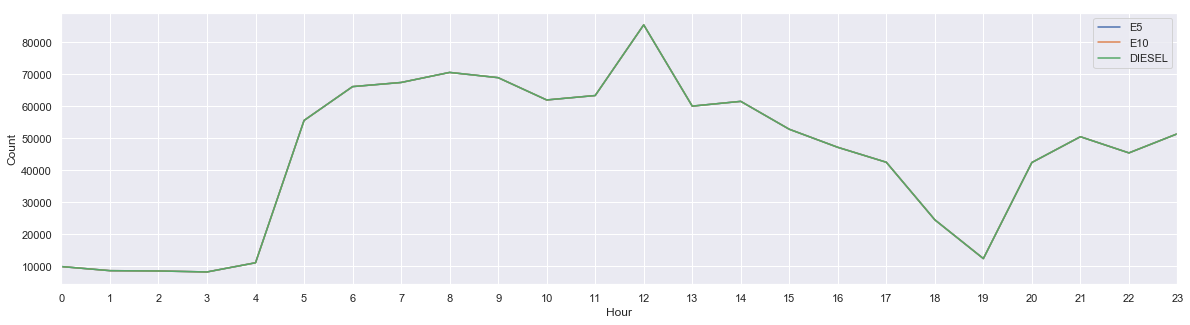

In [143]:

Hour_cheapprice=d1.groupby(d1.DATE_CHANGED.dt.hour)[['E5','E10','DIESEL']].count().plot(figsize=(20,5),xticks=range(0,24))
plt.xlabel('Hour')
plt.ylabel('Count')

# At 12'O clock there are highest price changes

# 9. Select 20 gas stations having the longest time history and visualize the average price per month. Use heatmap and only the prices between 12:00-13:00 of e10 and diesel.

In [149]:
twenty_stn=gas_station[0:20].reset_index()

In [150]:
twenty_stn

,STID,E5
0,5374ea5c-bf3e-4b0a-8504-049368adcdba,4963
1,9b81b226-01ca-4065-b68e-ad616adcd293,4887
2,a6fdf6e7-d225-49b1-95a6-9465c4f3a980,4565
3,4ed45709-ee79-489d-be83-b0d188d17494,4469
4,e0b19675-dfe9-45d4-9af0-59390cd39c09,4418
5,9caca729-1314-4ec5-afa1-11d7e024f91d,4219
6,061716a5-f4a6-4983-a36e-8ef1e8ce17e0,4182
7,6e2aa3c2-834d-45d3-b71d-e251deb18757,4181
8,639531b9-8650-4a54-ab54-6ab7915de516,4132
9,7c848417-1490-4752-9766-d05859b23f72,4125


# 10. Describe a possible business potential in € for the customer (textual description in the ipyhton file). Define the constraints of the business case 5 lines, the answer max 15 lines (high level summary)

# Business constraints:

As the price varies hourly know the cheapest price at a station at the given area would help 
 logistics company save money
 
# Summary.

1.From the above analysis we can see that the rpices of E5 and E10 closely follow the changes.
2.The Cheapest price in average is on Saturday at evening 6'O clock. If the fleet company can refuel the trucks at these hours it would save money.
3.also the fluctuation are highest at 12 pm hence they should avoid refuelling at this hours.